## Whisper

[official site: how to install and basic usage](https://github.com/openai/whisper)

**way 1: command**

`whisper input/voice_test.m4a --model small --language zh`<br>

> 1. model: model size: we chose small , the other options: tiny ,large, etc.<br>
> 2. language: zh , sound source is Chinese.

<table>
<thead>
<tr>
<th align="center">Size</th>
<th align="center">Parameters</th>
<th align="center">English-only model</th>
<th align="center">Multilingual model</th>
<th align="center">Required VRAM</th>
<th align="center">Relative speed</th>
</tr>
</thead>
<tbody>
<tr>
<td align="center">tiny</td>
<td align="center">39 M</td>
<td align="center"><code>tiny.en</code></td>
<td align="center"><code>tiny</code></td>
<td align="center">~1 GB</td>
<td align="center">~32x</td>
</tr>
<tr>
<td align="center">base</td>
<td align="center">74 M</td>
<td align="center"><code>base.en</code></td>
<td align="center"><code>base</code></td>
<td align="center">~1 GB</td>
<td align="center">~16x</td>
</tr>
<tr>
<td align="center">small</td>
<td align="center">244 M</td>
<td align="center"><code>small.en</code></td>
<td align="center"><code>small</code></td>
<td align="center">~2 GB</td>
<td align="center">~6x</td>
</tr>
<tr>
<td align="center">medium</td>
<td align="center">769 M</td>
<td align="center"><code>medium.en</code></td>
<td align="center"><code>medium</code></td>
<td align="center">~5 GB</td>
<td align="center">~2x</td>
</tr>
<tr>
<td align="center">large</td>
<td align="center">1550 M</td>
<td align="center">N/A</td>
<td align="center"><code>large</code></td>
<td align="center">~10 GB</td>
<td align="center">1x</td>
</tr>
</tbody>
</table>

**way 2: api**

In [2]:
import whisper

In [3]:
model = whisper.load_model('small')

In [4]:
# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio("./input/audio_water.m4a")
audio = whisper.pad_or_trim(audio)

In [5]:
audio.shape

(480000,)

In [6]:
import IPython.display as ipd

In [7]:
audio

array([-3.0517578e-05, -3.0517578e-05, -3.0517578e-05, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [8]:
sample_rate = 16000

In [9]:
ipd.Audio([audio], rate=sample_rate)

In [10]:
# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

In [11]:
mel.shape

torch.Size([80, 3000])

In [12]:
type(mel)

torch.Tensor

In [13]:
model.device

device(type='cuda', index=0)

> declare target Language is Chinese.

In [14]:
options = whisper.DecodingOptions(language='zh')

In [15]:
result = whisper.decode(model, mel,options)

In [16]:
result.text

'我出门买了一瓶矿泉水'

## mixed-voice recognize

whisper.transcribe 方法有好多的参数:
whisper_model主要是设置model模型<Br>
output_format 主要是设置字幕输出的文件格式<br>
temperature 值设置的较低，那么表述相对精准一些，值越大表述可能更加抽象一点<br>
args中有一个language语言，比如这里我要将音频转换为中文字幕 设置为cn 或者chinese [这里主要可以查看 ](https://github.com/openai/whisper/blob/main/whisper/tokenizer.py)

<table>
<thead>
<tr>
<th align="center">Size</th>
<th align="center">Parameters</th>
<th align="center">English-only model</th>
<th align="center">Multilingual model</th>
<th align="center">Required VRAM</th>
<th align="center">Relative speed</th>
</tr>
</thead>
<tbody>
<tr>
<td align="center">tiny</td>
<td align="center">39 M</td>
<td align="center"><code>tiny.en</code></td>
<td align="center"><code>tiny</code></td>
<td align="center">~1 GB</td>
<td align="center">~32x</td>
</tr>
<tr>
<td align="center">base</td>
<td align="center">74 M</td>
<td align="center"><code>base.en</code></td>
<td align="center"><code>base</code></td>
<td align="center">~1 GB</td>
<td align="center">~16x</td>
</tr>
<tr>
<td align="center">small</td>
<td align="center">244 M</td>
<td align="center"><code>small.en</code></td>
<td align="center"><code>small</code></td>
<td align="center">~2 GB</td>
<td align="center">~6x</td>
</tr>
<tr>
<td align="center">medium</td>
<td align="center">769 M</td>
<td align="center"><code>medium.en</code></td>
<td align="center"><code>medium</code></td>
<td align="center">~5 GB</td>
<td align="center">~2x</td>
</tr>
<tr>
<td align="center">large</td>
<td align="center">1550 M</td>
<td align="center">N/A</td>
<td align="center"><code>large</code></td>
<td align="center">~10 GB</td>
<td align="center">1x</td>
</tr>
</tbody>
</table>

In [23]:
import os

import whisper
import torch

In [24]:
model = whisper.load_model('small')

In [25]:
audio_path = './input/whisper_example_jfk.flac'

In [26]:
audio = whisper.load_audio(audio_path)

In [27]:
import IPython.display as ipd

In [28]:
audio

array([ 0.        ,  0.        ,  0.        , ..., -0.00765991,
       -0.01855469, -0.01391602], dtype=float32)

In [29]:
sample_rate = 16000

In [30]:
ipd.Audio([audio], rate=sample_rate)

In [11]:
import os
import matplotlib.pyplot as plt
import whisper
import torch
import torchaudio
from whisper.tokenizer import get_tokenizer
import IPython.display as ipd

In [7]:
model_name = 'small'

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = whisper.load_model(model_name).to(device)

In [2]:
audio_path = './input/whisper_example_jfk.flac'
language = 'en'

audio_path = './input/mix_1.m4a'
audio_path = './input/mix_2.m4a'
language = "zh"


audio_path = './input/Studio_Project_V3.mp3'
language = "en"

In [ ]:
result = model.transcribe(
    audio_path, language=language, temperature=0.0, word_timestamps=True
)

In [3]:
audio_path

'./input/Studio_Project_V3.mp3'

In [5]:
waveform, str = torchaudio.load(audio_path)

In [6]:
waveform

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.3232e-05, 1.3173e-05,
         1.3053e-05]])

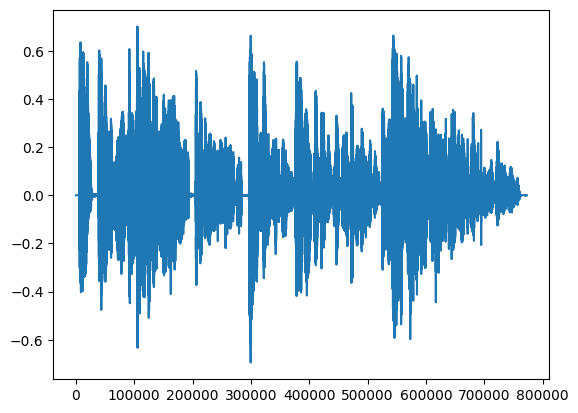

In [8]:
plt.plot(waveform.t().numpy())

In [14]:
ipd.Audio(waveform, rate=str)

> 明显By the way 开始识别 男声了.

In [52]:
result['language']

'en'

In [53]:
result['text']

' Remember, in the face of challenges, it is your unwavering determination that shall guide you towards success. Now as you venture into the kitchen, may the warmth of your heart infuse every dish with love. By the way, have you ever had an experience where technology made your shopping easier or more enjoyable?'

In [54]:
result

{'text': ' Remember, in the face of challenges, it is your unwavering determination that shall guide you towards success. Now as you venture into the kitchen, may the warmth of your heart infuse every dish with love. By the way, have you ever had an experience where technology made your shopping easier or more enjoyable?',
 'segments': [{'id': 0,
   'seek': 0,
   'start': 0.0,
   'end': 6.18,
   'text': ' Remember, in the face of challenges, it is your unwavering determination that shall guide you towards success.',
   'tokens': [50364,
    5459,
    11,
    294,
    264,
    1851,
    295,
    4759,
    11,
    309,
    307,
    428,
    517,
    4151,
    331,
    278,
    18432,
    300,
    4393,
    5934,
    291,
    3030,
    2245,
    13,
    50694],
   'temperature': 0.0,
   'avg_logprob': -0.175033300695285,
   'compression_ratio': 1.5097087378640777,
   'no_speech_prob': 0.030971122905611992,
   'words': [{'word': ' Remember,',
     'start': 0.0,
     'end': 0.36,
     'prob